In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.8.0

     |████████████████████████████████| 462 kB 5.2 MB/s 


In [ ]:
!pip install tensorflow-gpu==2.7.0

     |████████████████████████████████| 489.6 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 47.8 MB/s 
     |████████████████████████████████| 463 kB 58.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.7.0 which is incompatible.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential 
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

**Splitting dataset into train and test NEWDATASET**

In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/drive/MyDrive/NewPlants' #/Plant_leave_diseases_dataset_without_augmentation'
width=256
height=256
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_folder}/{plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing .ipynb_checkpoints/test ...
[INFO] Processing .ipynb_checkpoints/Plant_Diseases_Dataset(Augmented) ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Background_without_leaves ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Apple___healthy ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Corn___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Blueberry___healthy ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Cherry___healthy ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Apple___Cedar_apple_rust ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot ...
[INFO] Processing Plant_leave_diseases_dataset_without_augmentation/Cherry___Powdery_mildew .

In [ ]:
image_size = len(image_list)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Background_without_leaves' 'Blueberry___healthy'
 'Cherry___Powdery_mildew' 'Cherry___healthy'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Corn___Common_rust'
 'Corn___Northern_Leaf_Blight' 'Corn___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Peach___Bacterial_spot' 'Peach___healthy'
 'Pepper,_bell___Bacterial_spot' 'Pepper,_bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Strawberry___Leaf_scorch' 'Strawberry___healthy'
 'Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy' 'test']


In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

aug = ImageDataGenerator(
    rotation_range=15, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

[INFO] Spliting data to train, test


<h1>Modelling</h1>

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

## New Model Making!!!

In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 85, 85, 64)       

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train)//BS,
    epochs=EPOCHS, 
    verbose=1
    )

Epoch 1/25
169/169 [==============================] - 661s 4s/step - loss: 0.3293 - accuracy: 0.2229 - val_loss: 0.5098 - val_accuracy: 0.0280
Epoch 2/25
169/169 [==============================] - 657s 4s/step - loss: 0.0754 - accuracy: 0.5348 - val_loss: 0.2414 - val_accuracy: 0.1555
Epoch 3/25
169/169 [==============================] - 653s 4s/step - loss: 0.0616 - accuracy: 0.6258 - val_loss: 0.6543 - val_accuracy: 0.2579
Epoch 4/25
169/169 [==============================] - 655s 4s/step - loss: 0.0526 - accuracy: 0.6961 - val_loss: 0.3157 - val_accuracy: 0.4805
Epoch 5/25
169/169 [==============================] - 651s 4s/step - loss: 0.0604 - accuracy: 0.6429 - val_loss: 0.1932 - val_accuracy: 0.3301
Epoch 6/25
169/169 [==============================] - 650s 4s/step - loss: 0.0526 - accuracy: 0.7011 - val_loss: 0.2365 - val_accuracy: 0.2933
Epoch 7/25
169/169 [==============================] - 648s 4s/step - loss: 0.0449 - accuracy: 0.7519 - val_loss: 0.0627 - val_accuracy: 0.7141

Plot the train and val curve

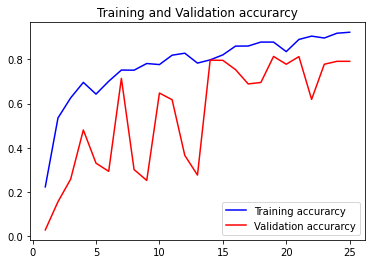

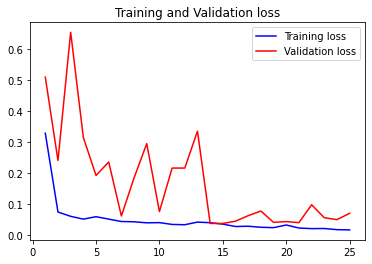

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Model Accuracy

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
43/43 [==============================] - 35s 820ms/step - loss: 0.0714 - accuracy: 0.7915
Test Accuracy: 79.14517521858215


In [ ]:
# save the model to disk
print("[INFO] Saving model...")
pickle.dump(model,open('plant_disease_cnn_model.pkl', 'wb'))

[INFO] Saving model...
INFO:tensorflow:Assets written to: ram://d16bcf2a-5a21-4636-952a-dbb76dd5e786/assets


In [ ]:
#save model weights in h5 file to disk
model.save_weights('plant_disease_model_weight.h5')

In [ ]:
from keras.models import load_model
#/content/drive/MyDrive/NewPlants/Plant_Disease_h5WeightModel_pklModel/plant_disease_model_weight.h5
h5_model_path='/content/drive/MyDrive/NewPlants/Plant_Disease_h5WeightModel_pklModel/plant_disease_model_weight.h5'
#---------------> model_disease=load_weights(h5_model_path)

ImportError: ignored

In [ ]:
#/content/drive/MyDrive/NewPlants/Plant_Disease_h5WeightModel_pklModel/label_transform.pkl
label_binarizer_path='/content/drive/MyDrive/NewPlants/Plant_Disease_h5WeightModel_pklModel/label_transform.pkl'
label_binarizer=pickle.load(open(label_binarizer_path,'rb'))
print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Background_without_leaves' 'Blueberry___healthy'
 'Cherry___Powdery_mildew' 'Cherry___healthy'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Corn___Common_rust'
 'Corn___Northern_Leaf_Blight' 'Corn___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Peach___Bacterial_spot' 'Peach___healthy'
 'Pepper,_bell___Bacterial_spot' 'Pepper,_bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Strawberry___Leaf_scorch' 'Strawberry___healthy'
 'Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy' 'test']


In [ ]:
pkl_model_path='/content/drive/MyDrive/NewPlants/Plant_Disease_h5WeightModel_pklModel/plant_disease_cnn_model.pkl'
loaded_model = pickle.load(open(pkl_model_path, 'rb'))
#/content/drive/MyDrive/NewPlants/Plant_Disease_h5WeightModel_pklModel/plant_disease_cnn_model.pkl

Saving pure h5 file (not h5 weight file)

In [ ]:
loaded_model.save("plant_disease_pure_h5_model.h5")

In [ ]:
model_disease=loaded_model

In [ ]:
model_disease.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 85, 85, 64)       

In [ ]:
loaded_model.load_weights(h5_model_path)

Testing model

In [ ]:
def testing_img(img_dir):
  im=convert_image_to_array(image_dir)
  np_image_li = np.array(im, dtype=np.float16) / 225.0
  npp_image = np.expand_dims(np_image_li, axis=0)
  return npp_image

In [ ]:
#Test no:1
#image_dir="drive/MyDrive/NewPlants/plant_leave_diseases_dataset_without_augmentation/TomatoHealthy4.JPG"
image_dir='/content/drive/MyDrive/NewPlants/Plant_leave_diseases_dataset_without_augmentation/Tomato___healthy/image (113).JPG'
npp_image=testing_img(image_dir)
result=model_disease.predict(npp_image)
print(result)

[[7.96884570e-28 3.82838511e-27 4.96150782e-33 4.49095950e-25
  3.70863326e-26 1.31707354e-25 2.01063435e-26 1.16013650e-28
  7.40149893e-22 2.63283314e-28 8.03793182e-29 1.04868896e-26
  3.66276392e-37 1.53524749e-23 6.72880990e-31 5.11433026e-36
  2.16112699e-30 3.05870664e-38 9.27300474e-31 4.59015972e-29
  6.99499921e-20 1.76092566e-34 1.35493345e-31 2.85992220e-34
  1.98885431e-27 3.54010304e-31 2.56568969e-28 4.03099087e-23
  2.42902347e-30 4.63896509e-25 8.89412504e-29 7.64314514e-31
  1.63500487e-30 1.00000000e+00 4.91962826e-19]]


In [ ]:
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])

probability:1.0
Tomato___healthy


In [ ]:
#Test no:2
image_dir='/content/drive/MyDrive/NewPlants/Plant_leave_diseases_dataset_without_augmentation/Grape___Esca_(Black_Measles)/image (1111).JPG'
npp_image=testing_img(image_dir)
result=model_disease.predict(npp_image)
print(result)

[[2.75747120e-20 5.75321665e-16 9.91989319e-19 3.73437768e-15
  9.27350124e-12 6.75471609e-21 3.16690316e-18 7.69997286e-17
  2.96915652e-11 1.35350836e-15 1.58171677e-16 7.17647589e-18
  7.45589571e-14 1.00000000e+00 1.75177686e-08 3.12186645e-16
  3.17918726e-19 4.10826895e-23 6.37903521e-13 1.01920933e-16
  1.18373860e-16 2.98947830e-18 4.78322649e-18 6.61298273e-14
  7.20975585e-19 1.12808020e-16 3.10017404e-15 1.52785965e-12
  2.59413379e-19 3.25278466e-16 3.40621319e-15 3.49457236e-19
  1.21008071e-19 5.78582931e-14 4.56122423e-12]]


In [ ]:
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])

probability:1.0
Grape___Esca_(Black_Measles)


In [ ]:
#Test no:3
image_dir='/content/drive/MyDrive/NewPlants/test_111/RS_Rust 1648.JPG'
npp_image=testing_img(image_dir)
result=model_disease.predict(npp_image)
print(result)

[[5.22923556e-13 6.22654597e-13 2.22022053e-16 1.08005185e-11
  3.77886211e-09 5.57624977e-16 5.71748811e-12 2.40658391e-14
  2.74328795e-05 9.96591330e-01 1.28400202e-09 3.19434618e-11
  5.02219863e-16 3.34559741e-11 6.33472929e-13 8.72535076e-15
  6.98448948e-13 6.70297620e-18 8.39420634e-12 2.81981080e-16
  6.55671897e-07 3.20234494e-14 4.03916385e-15 1.41390566e-10
  4.94964253e-15 2.69241790e-12 2.44762327e-13 6.32555768e-08
  2.84063056e-13 3.60876802e-12 1.63116479e-10 3.24301480e-12
  2.31601075e-17 7.64936825e-09 3.38047650e-03]]


In [ ]:
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])

probability:0.9965913
Corn___Common_rust


In [ ]:
#Test no:4
image_dir='/content/drive/MyDrive/NewPlants/test_111/2c48971d-9f73-401d-a62a-f3729d08b6c2___RS_Early.B 7463.JPG'
npp_image=testing_img(image_dir)
result=model_disease.predict(npp_image)
print(result)

[[1.9115634e-17 1.7796248e-19 2.6883542e-16 4.0936916e-14 3.2485206e-15
  2.6435232e-19 2.8210479e-17 8.4632073e-20 5.0059978e-13 1.9753029e-14
  1.4664183e-17 1.2550640e-18 6.2372694e-17 5.3759831e-16 2.6243675e-15
  2.8829798e-19 5.1207271e-16 1.7146535e-23 4.4290342e-16 7.4845907e-18
  1.0000000e+00 7.0303409e-19 6.7681350e-19 3.9241014e-16 7.1313619e-19
  1.8611265e-14 3.8201991e-13 4.9018871e-12 6.1748442e-16 4.9507792e-14
  7.5939460e-15 1.2945893e-16 3.9655773e-22 1.2872551e-11 1.8845727e-08]]


In [ ]:
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])

probability:1.0
Potato___Early_blight


In [ ]:
#Test no:5
image_dir='/content/drive/MyDrive/NewPlants/test_111/c526079d-2480-4cc0-aa26-ca2a9d612cc3___FREC_Pwd.M 4586.JPG'
npp_image=testing_img(image_dir)
result=model_disease.predict(npp_image)
print(result)

[[3.92024651e-12 1.82545229e-17 3.07704418e-11 7.90952644e-13
  1.99768951e-11 2.00266526e-10 9.99999285e-01 1.49038626e-12
  4.95131605e-13 8.07351527e-13 5.32710486e-13 8.93119578e-10
  1.78307313e-14 7.65999677e-12 1.12533095e-12 3.27535846e-15
  6.73490473e-12 1.11123384e-13 2.55304336e-14 2.25005032e-11
  6.35010489e-16 2.96842656e-13 1.23651965e-11 8.28136388e-14
  2.57462942e-13 1.43257507e-11 8.82933338e-10 4.64406753e-07
  7.41362158e-13 2.56634368e-13 3.47945353e-11 2.92676040e-14
  5.27482814e-11 1.39847294e-13 2.28782355e-07]]


In [ ]:
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])

probability:0.9999993
Cherry___Powdery_mildew


Trying something with H5 file

In [ ]:
# weight of h5 file in 'loaded_model' which consist of pkl file also
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 85, 85, 64)       

In [ ]:
!pip uninstall streamlit

Found existing installation: streamlit 1.8.1
Uninstalling streamlit-1.8.1:
  Would remove:
    /usr/local/bin/streamlit
    /usr/local/bin/streamlit.cmd
    /usr/local/lib/python3.7/dist-packages/streamlit-1.8.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/streamlit/*
Proceed (y/n)? y
  Successfully uninstalled streamlit-1.8.1


In [ ]:
#Library imports
import numpy as np
import streamlit as st
import cv2
import tensorflow 
import pickle
import tensorflow
from tensorflow.keras.models import load_model


#Loading the Model
#####model = load_model(r'C:\Users\Rahul Anandraj\Downloads\Plant Disease Flask App\Plant_Disease\plant_disease_model_weight.h5')
model = pickle.load(open('/content/drive/MyDrive/NewPlants/Plant_Disease_h5WeightModel_pklModel/plant_disease_cnn_model.pkl','rb'))

#Name of Classes
CLASS_NAMES = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust'
,'Apple___healthy','Background_without_leaves','Blueberry___healthy',
 'Cherry___Powdery_mildew','Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy',
 'Peach___Bacterial_spot','Peach___healthy',
 'Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy',
 'Potato___Early_blight','Potato___Late_blight','Potato___healthy',
 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'test']

#Setting Title of App
st.title("Plant Disease Detection")
st.markdown("Upload an image of the plant leaf")

#Uploading the dog image
plant_image = st.file_uploader("Choose an image...", type="jpg")
submit = st.button('Predict')
#On predict button click
if submit:


    if plant_image is not None:

        # Convert the file to an opencv image.
        file_bytes = np.asarray(bytearray(plant_image.read()), dtype=np.uint8)
        opencv_image = cv2.imdecode(file_bytes, 1)



        # Displaying the image
        st.image(opencv_image, channels="BGR")
        st.write(opencv_image.shape)
        #Resizing the image
        opencv_image = cv2.resize(opencv_image, (256,256))
        #Convert image to 4 Dimension
        opencv_image.shape = (1,256,256,3)
        #Make Prediction
        Y_pred = model.predict(opencv_image)  ##########
        result = CLASS_NAMES[np.argmax(Y_pred)]
        st.title(str("This is "+result.split('-')[0]+ " leaf with " + result.split('-')[1]))

AttributeError: ignored